# Data Analysis - Product Insight

In [61]:
# Reading in the initial data

import pandas as pd
import matplotlib.pyplot as plt




Data = pd.read_csv("Sales.csv")
Fiscal_Calendar =  pd.read_csv("de_dates.csv")    


In [64]:
Data.head()
Fiscal_Calendar.head()

,CALENDAR_DATE,WEEKDAY_NUMBER,WEEKDAY_NAME,FISCAL_WEEK_OF_MONTH,FISCAL_WEEK_OF_YEAR,FISCAL_MONTH_NUMBER,FISCAL_MONTH_NAME,FISCAL_FIRST_DAY_OF_WEEK,FISCAL_LAST_DAY_OF_WEEK,FISCAL_FIRST_DAY_OF_MONTH,...,FISCAL_YEAR_WEEK,FISCAL_YEAR_MONTH,FISCAL_YEAR_QUARTER,CALENDAR_WEEK_OF_MONTH,CALENDAR_WEEK_OF_YEAR,CALENDAR_FIRST_DAY_OF_MONTH,CALENDAR_LAST_DAY_OF_MONTH,CALENDAR_FIRST_DAY_OF_YEAR,CALENDAR_LAST_DAY_OF_YEAR,WEEKEND
0,2010-01-31,1,Sun,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,5,4,2010-01-01,2010-01-31,2010-01-01,2010-12-31,True
1,2010-02-01,2,Mon,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
2,2010-02-02,3,Tue,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
3,2010-02-03,4,Wed,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
4,2010-02-04,5,Thu,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False


In [65]:
Fiscal_Calendar.head()

,CALENDAR_DATE,WEEKDAY_NUMBER,WEEKDAY_NAME,FISCAL_WEEK_OF_MONTH,FISCAL_WEEK_OF_YEAR,FISCAL_MONTH_NUMBER,FISCAL_MONTH_NAME,FISCAL_FIRST_DAY_OF_WEEK,FISCAL_LAST_DAY_OF_WEEK,FISCAL_FIRST_DAY_OF_MONTH,...,FISCAL_YEAR_WEEK,FISCAL_YEAR_MONTH,FISCAL_YEAR_QUARTER,CALENDAR_WEEK_OF_MONTH,CALENDAR_WEEK_OF_YEAR,CALENDAR_FIRST_DAY_OF_MONTH,CALENDAR_LAST_DAY_OF_MONTH,CALENDAR_FIRST_DAY_OF_YEAR,CALENDAR_LAST_DAY_OF_YEAR,WEEKEND
0,2010-01-31,1,Sun,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,5,4,2010-01-01,2010-01-31,2010-01-01,2010-12-31,True
1,2010-02-01,2,Mon,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
2,2010-02-02,3,Tue,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
3,2010-02-03,4,Wed,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False
4,2010-02-04,5,Thu,1,1,1,Feb,2010-01-31,2010-02-06,2010-01-31,...,201001,201001,20101,1,5,2010-02-01,2010-02-28,2010-01-01,2010-12-31,False


In [82]:
# Handling missing values
Data.fillna(0, inplace=True)
Fiscal_Calendar.fillna(0, inplace=True)

# Convert TRANSACTION_DATE to datetime format
Data['TRANSACTION_DATE'] = pd.to_datetime(Data['TRANSACTION_DATE'], errors='coerce')
Data.dropna(subset=['TRANSACTION_DATE'], inplace=True)


In [83]:
# Format numeric values
Data['NET_SALES_UNITS'] = Data['NET_SALES_UNITS'].astype(int)
Data['ORIGINAL_PRICE'] = Data['ORIGINAL_PRICE'].astype(float)
Data['DISCOUNTS_USD'] = Data['DISCOUNTS_USD'].astype(float)


In [85]:
# Identify outliers using IQR method for NET_SALES_UNITS
Q1 = Data['NET_SALES_UNITS'].quantile(0.25)
Q3 = Data['NET_SALES_UNITS'].quantile(0.75)
IQR = Q3 - Q1

outliers = Data[(Data['NET_SALES_UNITS'] < (Q1 - 1.5 * IQR)) | (Data['NET_SALES_UNITS'] > (Q3 + 1.5 * IQR))]


In [92]:
# Convert date columns to datetime format
Data['TRANSACTION_DATE'] = pd.to_datetime(Data['TRANSACTION_DATE'], errors='coerce')
Fiscal_Calendar['CALENDAR_DATE'] = pd.to_datetime(Fiscal_Calendar['CALENDAR_DATE'], errors='coerce')


In [95]:
# Merge sales_data with fiscal_calendar
merged_data = pd.merge(Data, Fiscal_Calendar, left_on='TRANSACTION_DATE', right_on='CALENDAR_DATE', how='left')


In [96]:
# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()
merged_data_head


,TRANSACTION_DATE,LOCATION_ID,ORDER_ID,CUSTOMER_ID,SKU_NUMBER,STYLE_NUMBER,COLOUR_NAME,COLOUR_NUMBER,COLOUR_CODE,COLOUR_FAMILY,...,FISCAL_YEAR_WEEK,FISCAL_YEAR_MONTH,FISCAL_YEAR_QUARTER,CALENDAR_WEEK_OF_MONTH,CALENDAR_WEEK_OF_YEAR,CALENDAR_FIRST_DAY_OF_MONTH,CALENDAR_LAST_DAY_OF_MONTH,CALENDAR_FIRST_DAY_OF_YEAR,CALENDAR_LAST_DAY_OF_YEAR,WEEKEND
0,2023-09-15,5381359054857415170,-6719308655116430000,2615747808920676222,-7253962859621530000,-4147267151382690000,WHITE,-7990442703153960000,WHT,WHITE,...,202333,202308,20233,3,37,2023-09-01,2023-09-30,2023-01-01,2023-12-31,False
1,2022-03-18,-4199173001801520000,-6378926798744470000,1887452110738807739,5422249653400898675,-313994741047813000,VIVID VIOLET,6700927323266645156,VVV,PURPLE,...,202207,202202,20221,3,11,2022-03-01,2022-03-31,2022-01-01,2022-12-31,False
2,2023-07-14,5685263721614244213,6102719515008744276,-1296229179810210000,6245575513011636165,-4724890390615580000,NAVY,-1334537463826090000,NVY,NAVY,...,202324,202306,20232,3,28,2023-07-01,2023-07-31,2023-01-01,2023-12-31,False
3,2022-04-06,-5067008464076210000,-5982285096719080000,-2738066512337320000,-8479039255313250000,-1553484492876750000,NAVY,-1334537463826090000,NVY,NAVY,...,202210,202203,20221,2,14,2022-04-01,2022-04-30,2022-01-01,2022-12-31,False
4,2023-06-12,-5591079094253810000,-3971618995716690000,-4612109181828620000,3357108323404969175,-3145342290914690000,BLACK,-4199173001801520000,BLK,BLACK,...,202320,202305,20232,3,24,2023-06-01,2023-06-30,2023-01-01,2023-12-31,False


Total Sales Over Time


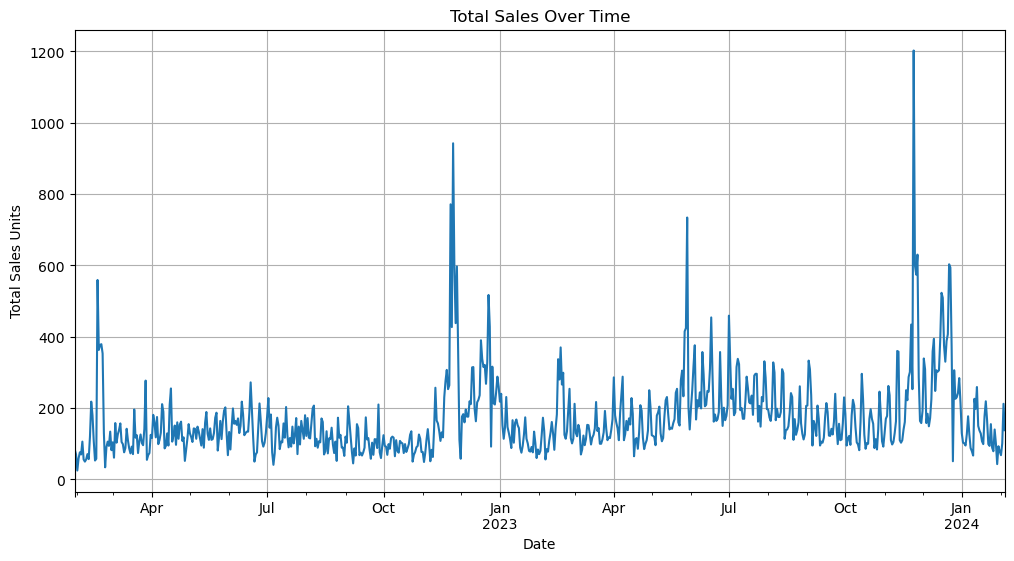

In [97]:
import matplotlib.pyplot as plt

# Convert TRANSACTION_DATE to datetime formatData['TRANSACTION_DATE'] = pd.to_datetime(sales_data['TRANSACTION_DATE'])

# Group by transaction date to get total sales per day
sales_over_time = Data.groupby('TRANSACTION_DATE')['NET_SALES_UNITS'].sum()

# Plot total sales over time
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()


Sales by Product Type


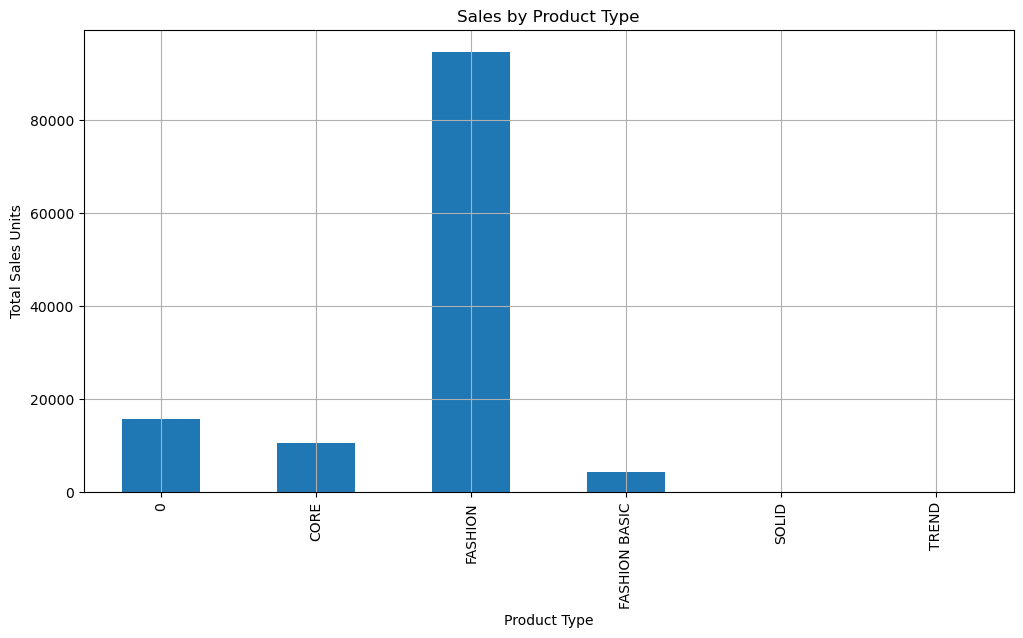

In [87]:
# Group by product type to get total sales
sales_by_product_type = Data.groupby('PRODUCT_TYPE')['NET_SALES_UNITS'].sum()

# Plot sales by product type
plt.figure(figsize=(12, 6))
sales_by_product_type.plot(kind='bar')
plt.title('Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()


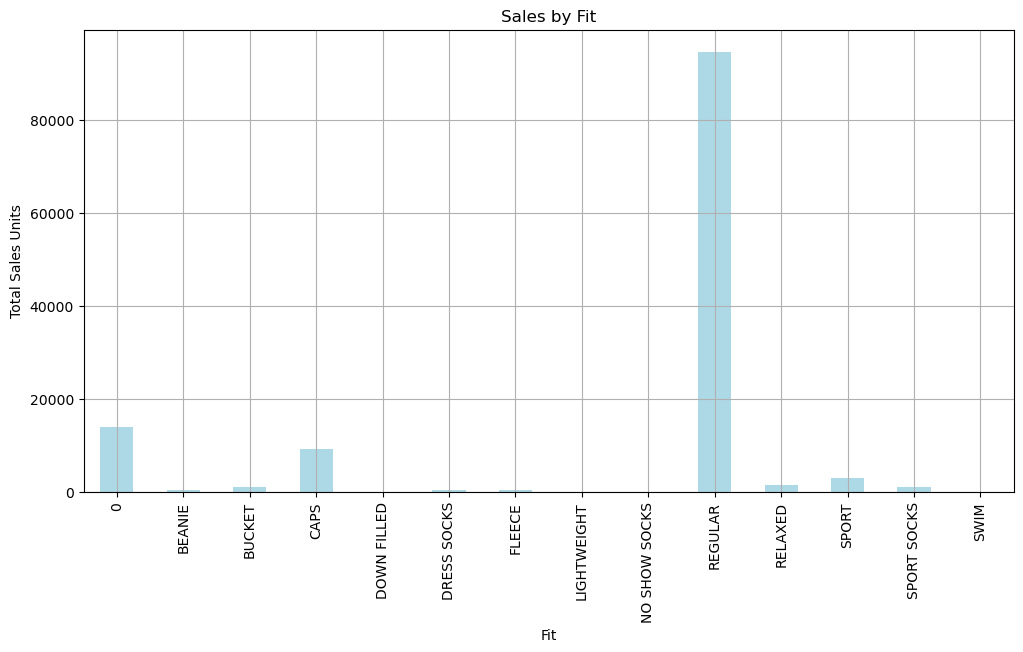

In [108]:
# Group by FIT to get total sales
sales_by_fit = merged_data.groupby('FIT')['NET_SALES_UNITS'].sum()

# Plot sales by fit
plt.figure(figsize=(12, 6))
sales_by_fit.plot(kind='bar', color='lightblue')
plt.title('Sales by Fit')
plt.xlabel('Fit')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()


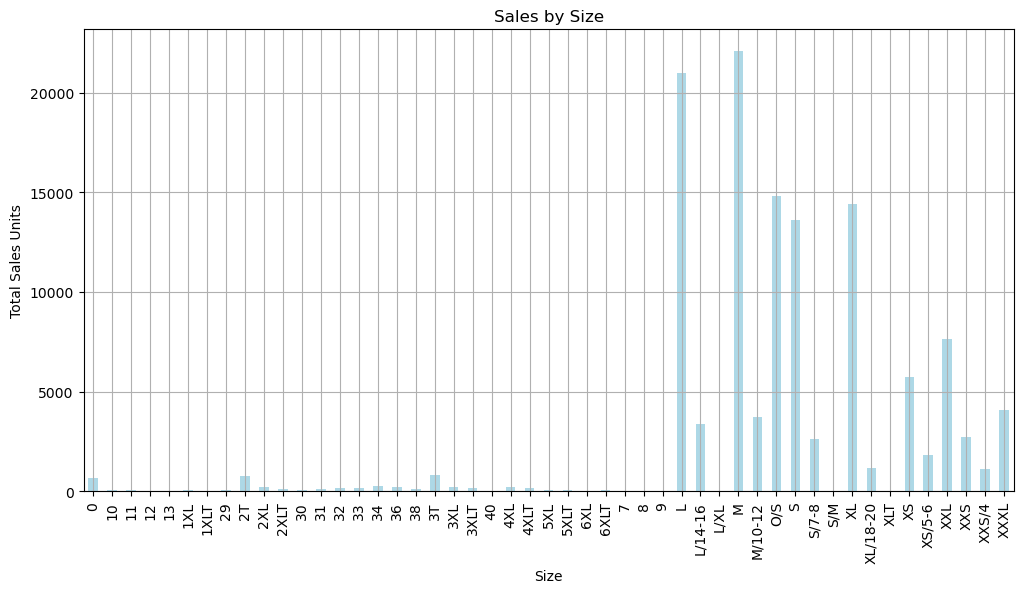

In [111]:
# Group by SIZE to get total sales
sales_by_size = merged_data.groupby('SIZE')['NET_SALES_UNITS'].sum()

# Plot sales by size
plt.figure(figsize=(12, 6))
sales_by_size.plot(kind='bar', color='lightblue')
plt.title('Sales by Size')
plt.xlabel('Size')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()


In [127]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


 Sales Prediction


/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

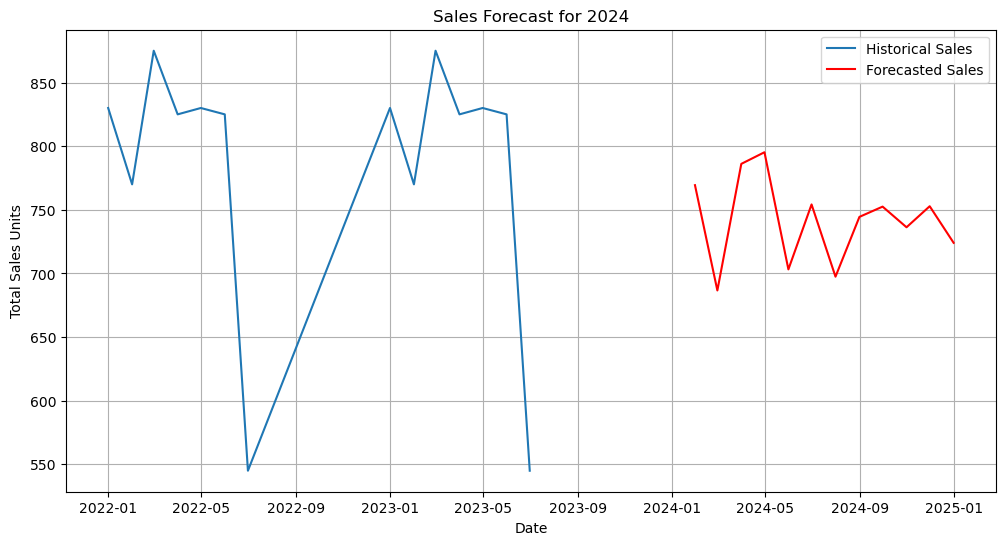

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data to simulate the merged data
data = {
    'TRANSACTION_DATE': pd.date_range(start='1/1/2022', periods=200, freq='D').tolist() +
                        pd.date_range(start='1/1/2023', periods=200, freq='D').tolist(),
    'NET_SALES_UNITS': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50] * 40
}

# Create DataFrame
merged_data = pd.DataFrame(data)

# Step 1: Prepare the Data
# Convert TRANSACTION_DATE to datetime format
merged_data['TRANSACTION_DATE'] = pd.to_datetime(merged_data['TRANSACTION_DATE'])

# Aggregate sales by month
monthly_sales = merged_data.groupby(merged_data['TRANSACTION_DATE'].dt.to_period('M'))['NET_SALES_UNITS'].sum()

# Convert to datetime index
monthly_sales.index = monthly_sales.index.to_timestamp()

# Step 2: Fit the ARIMA Model
model = ARIMA(monthly_sales, order=(5, 1, 0))
model_fit = model.fit()

# Step 3: Make Predictions
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start='2024-01-01', periods=12, freq='M')

# Plot the historical sales and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Total Sales Units')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nedarostami/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


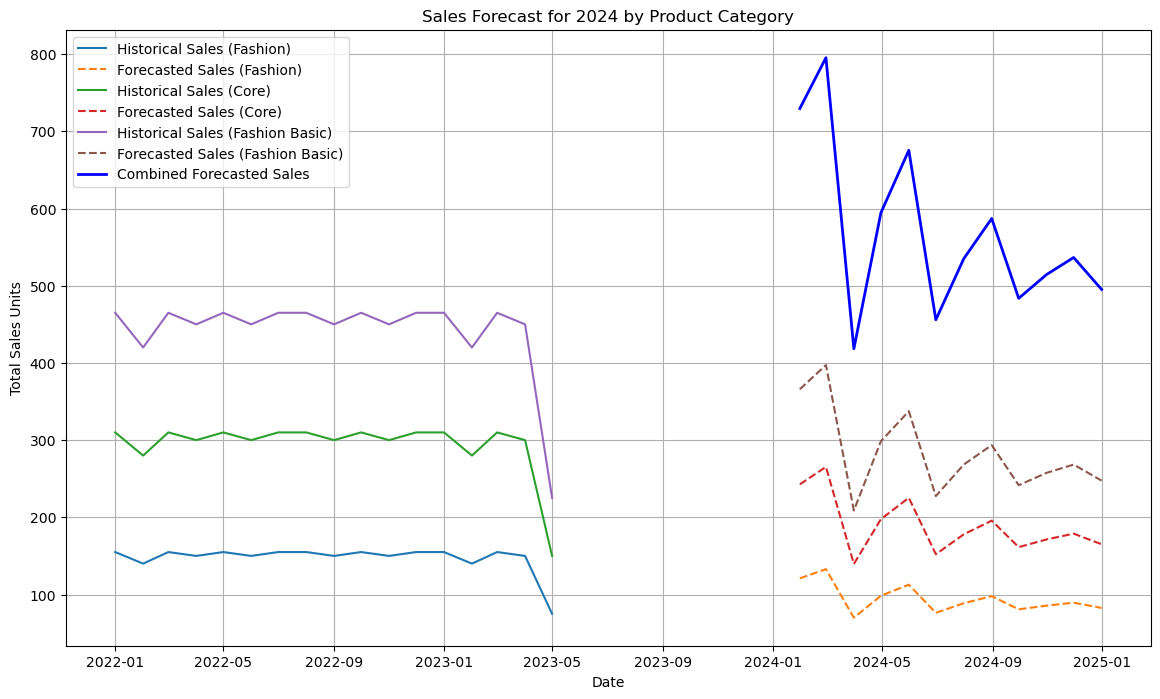

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data to simulate the merged data
dates = pd.date_range(start='1/1/2022', periods=500, freq='D')
categories = ['Fashion', 'Core', 'Fashion Basic']
sales_units = [5, 10, 15]

# Create lists with the correct lengths
transaction_dates = dates.tolist() * 3
product_categories = categories * (len(transaction_dates) // len(categories))
net_sales_units = sales_units * (len(transaction_dates) // len(sales_units))

# Create DataFrame
data = {
    'TRANSACTION_DATE': transaction_dates,
    'PRODUCT_CATEGORY': product_categories,
    'NET_SALES_UNITS': net_sales_units
}

merged_data = pd.DataFrame(data)

# Convert TRANSACTION_DATE to datetime format
merged_data['TRANSACTION_DATE'] = pd.to_datetime(merged_data['TRANSACTION_DATE'])

# Function to forecast sales for each product category
def forecast_sales_by_category(data, category):
    # Filter data for the specific category
    category_data = data[data['PRODUCT_CATEGORY'] == category]
    
    # Aggregate sales by month
    monthly_sales = category_data.groupby(category_data['TRANSACTION_DATE'].dt.to_period('M'))['NET_SALES_UNITS'].sum()
    
    # Convert to datetime index
    monthly_sales.index = monthly_sales.index.to_timestamp()
    
    # Fit ARIMA model on full data
    model = ARIMA(monthly_sales, order=(5, 1, 0))
    model_fit = model.fit()
    
    # Forecast for 2024 (12 months)
    forecast = model_fit.forecast(steps=12)
    forecast_index = pd.date_range(start='2024-01-01', periods=12, freq='M')
    
    return monthly_sales, forecast, forecast_index

# Forecast sales for each product category and combine forecasts
categories = merged_data['PRODUCT_CATEGORY'].unique()
combined_forecast = pd.Series(dtype='float64')
all_forecasts = {}
historical_data = {}

for category in categories:
    historical, forecast, forecast_index = forecast_sales_by_category(merged_data, category)
    combined_forecast = combined_forecast.add(pd.Series(forecast.values, index=forecast_index), fill_value=0)
    all_forecasts[category] = (historical, forecast, forecast_index)
    historical_data[category] = historical

# Plot all forecasts in one chart
plt.figure(figsize=(14, 8))

for category in categories:
    historical, forecast, forecast_index = all_forecasts[category]
    plt.plot(historical.index, historical, label=f'Historical Sales ({category})')
    plt.plot(forecast_index, forecast, label=f'Forecasted Sales ({category})', linestyle='dashed')

plt.plot(combined_forecast.index, combined_forecast, label='Combined Forecasted Sales', color='blue', linewidth=2)
plt.title('Sales Forecast for 2024 by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales Units')
plt.legend()
plt.grid(True)
plt.show()


Sales by Location Type


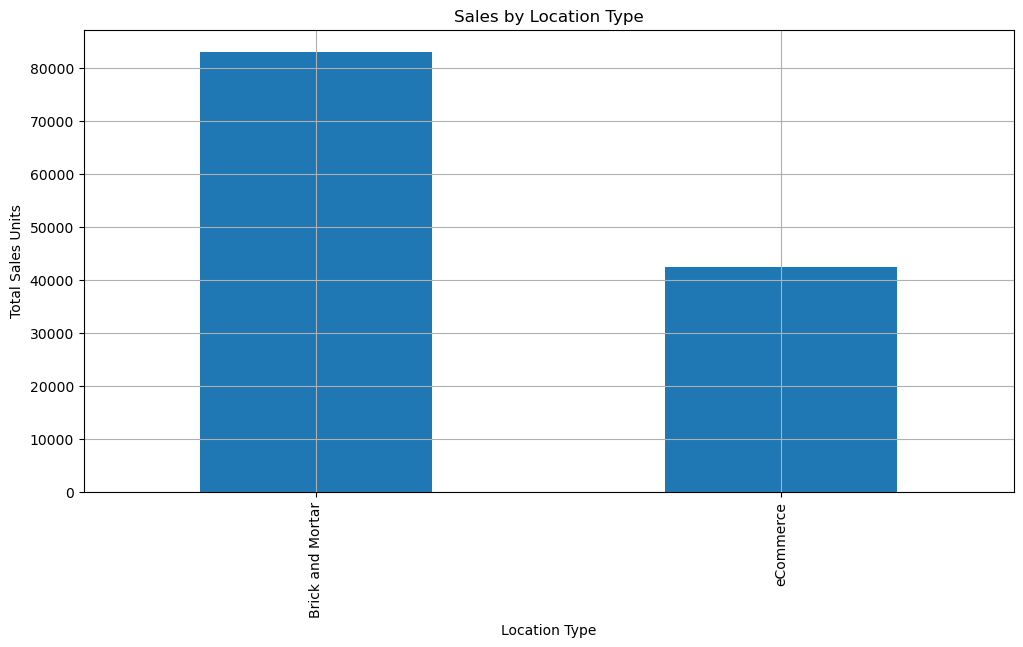

,TRANSACTION_DATE,LOCATION_ID,ORDER_ID,CUSTOMER_ID,SKU_NUMBER,STYLE_NUMBER,COLOUR_NAME,COLOUR_NUMBER,COLOUR_CODE,COLOUR_FAMILY,...,FIT,PRODUCT_TYPE,LOGO_TYPE,SIZE,BUSINESS,GROUP,ORIGINAL_PRICE,DISCOUNTS_USD,NET_SALES_UNITS,Location_Type
0,2023-09-15,5381359054857415170,-6719308655116430000,2615747808920676222,-7253962859621530000,-4147267151382690000,WHITE,-7990442703153960000,WHT,WHITE,...,REGULAR,FASHION,FASHION,M,MENS,TOPS,32.88,0.00,1,Brick and Mortar
1,2022-03-18,-4199173001801520000,-6378926798744470000,1887452110738807739,5422249653400898675,-313994741047813000,VIVID VIOLET,6700927323266645156,VVV,PURPLE,...,REGULAR,FASHION BASIC,CLASSIC,XL,MENS,TOPS,32.88,0.00,1,eCommerce
2,2023-07-14,5685263721614244213,6102719515008744276,-1296229179810210000,6245575513011636165,-4724890390615580000,NAVY,-1334537463826090000,NVY,NAVY,...,REGULAR,FASHION,FASHION,L,MENS,TOPS,32.88,0.00,1,Brick and Mortar
3,2022-04-06,-5067008464076210000,-5982285096719080000,-2738066512337320000,-8479039255313250000,-1553484492876750000,NAVY,-1334537463826090000,NVY,NAVY,...,REGULAR,FASHION,FASHION,L,MENS,TOPS,32.88,1.21,1,Brick and Mortar
4,2023-06-12,-5591079094253810000,-3971618995716690000,-4612109181828620000,3357108323404969175,-3145342290914690000,BLACK,-4199173001801520000,BLK,BLACK,...,REGULAR,FASHION,FASHION,L,MENS,TOPS,32.88,1.21,1,Brick and Mortar


In [88]:
# Ensure the Location_Type column is added correctly
Data['Location_Type'] = Data['LOCATION_ID'].apply(
    lambda x: 'eCommerce' if x == -4199173001801520000 else 'Brick and Mortar'
)

# Verify the Location_Type column
sales_data_head_with_location_type = Data.head()

# Group by location type to get total sales
sales_by_location_type = Data.groupby('Location_Type')['NET_SALES_UNITS'].sum()

# Plot sales by location type
plt.figure(figsize=(12, 6))
sales_by_location_type.plot(kind='bar')
plt.title('Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()

sales_data_head_with_location_type


In [100]:
# Extract year and month from TRANSACTION_DATE
merged_data['YearMonth'] = merged_data['TRANSACTION_DATE'].dt.to_period('M')


In [101]:
# Group by YearMonth and sum NET_SALES_UNITS
monthly_sales = merged_data.groupby('YearMonth')['NET_SALES_UNITS'].sum().reset_index()

# Convert YearMonth to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()


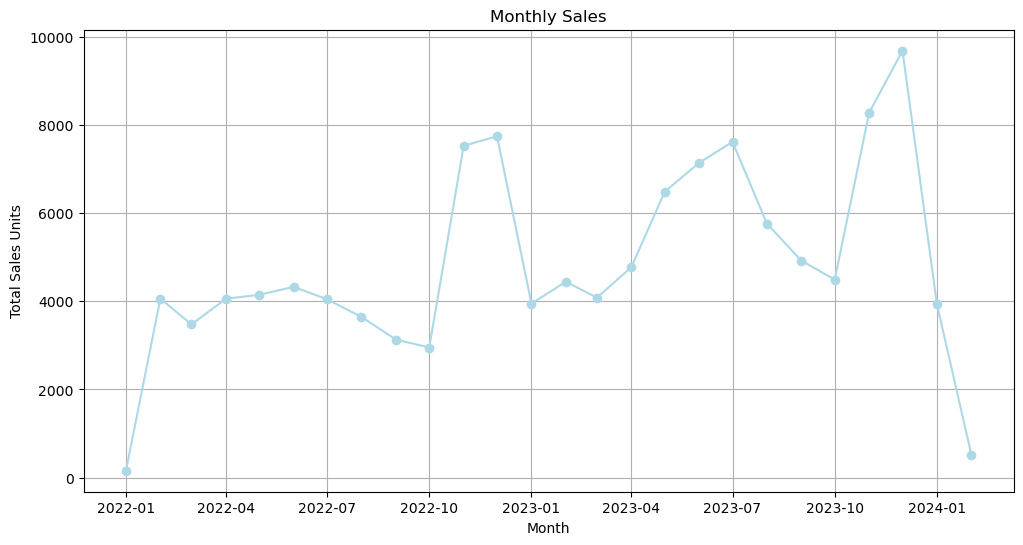

In [102]:
# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['NET_SALES_UNITS'], color='lightblue', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Units')
plt.grid(True)
plt.show()


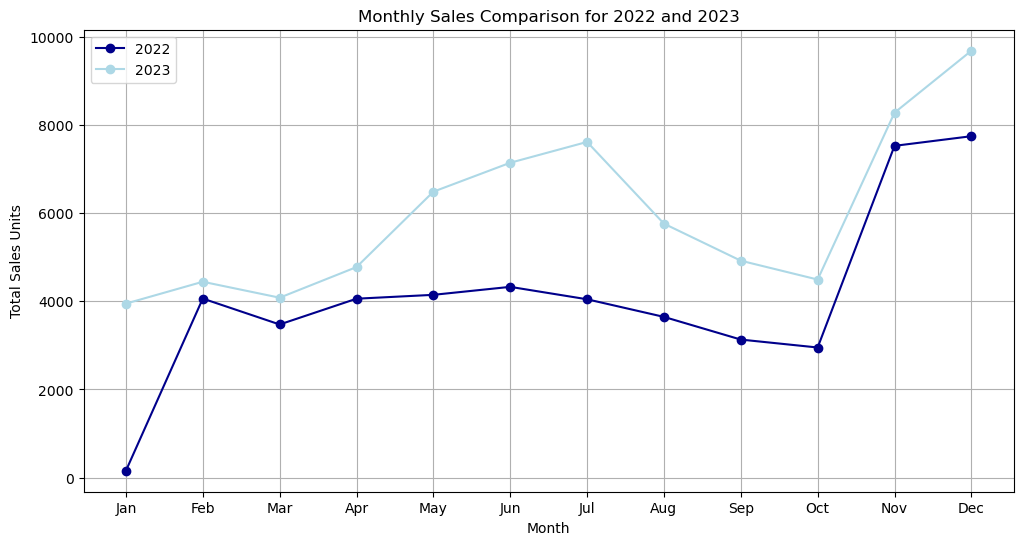

In [104]:
# Ensure monthly data is sorted correctly for each year
sales_2022 = monthly_sales[monthly_sales['YearMonth'].dt.year == 2022].set_index('YearMonth')
sales_2023 = monthly_sales[monthly_sales['YearMonth'].dt.year == 2023].set_index('YearMonth')

# Reset the index to month for better plotting
sales_2022.index = sales_2022.index.month
sales_2023.index = sales_2023.index.month

# Plot both years on the same chart
plt.figure(figsize=(12, 6))
plt.plot(sales_2022.index, sales_2022['NET_SALES_UNITS'], color='darkblue', marker='o', label='2022')
plt.plot(sales_2023.index, sales_2023['NET_SALES_UNITS'], color='lightblue', marker='o', label='2023')
plt.title('Monthly Sales Comparison for 2022 and 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales Units')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()



In [105]:
# Extract quarter from TRANSACTION_DATE
merged_data['YearQuarter'] = merged_data['TRANSACTION_DATE'].dt.to_period('Q')


In [106]:
# Group by YearQuarter and sum NET_SALES_UNITS
quarterly_sales = merged_data.groupby('YearQuarter')['NET_SALES_UNITS'].sum().reset_index()

# Convert YearQuarter to datetime for plotting
quarterly_sales['YearQuarter'] = quarterly_sales['YearQuarter'].dt.to_timestamp()


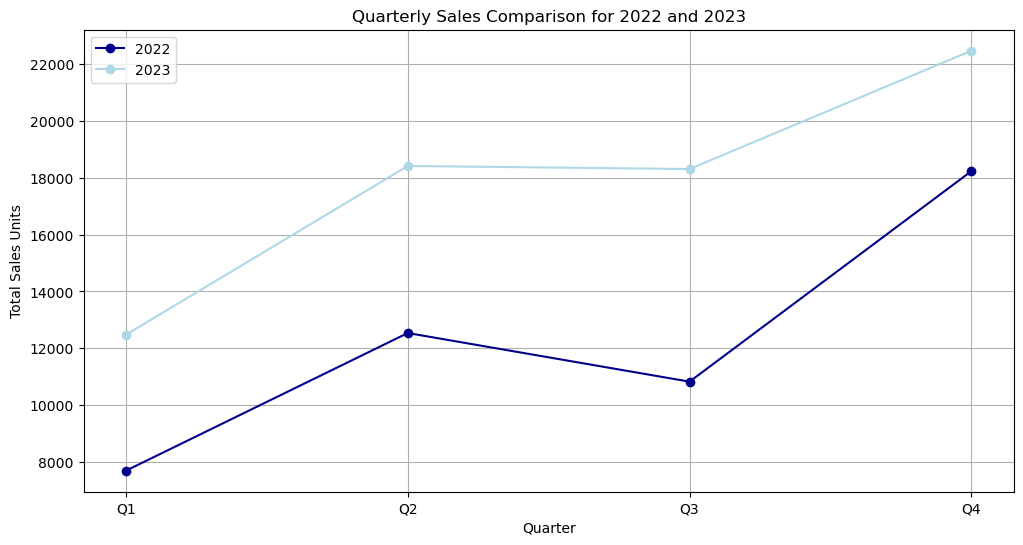

In [107]:
# Ensure quarterly data is sorted correctly for each year
sales_2022_q = quarterly_sales[quarterly_sales['YearQuarter'].dt.year == 2022].set_index('YearQuarter')
sales_2023_q = quarterly_sales[quarterly_sales['YearQuarter'].dt.year == 2023].set_index('YearQuarter')

# Reset the index to quarter for better plotting
sales_2022_q.index = sales_2022_q.index.quarter
sales_2023_q.index = sales_2023_q.index.quarter

# Plot both years on the same chart
plt.figure(figsize=(12, 6))
plt.plot(sales_2022_q.index, sales_2022_q['NET_SALES_UNITS'], color='darkblue', marker='o', label='2022')
plt.plot(sales_2023_q.index, sales_2023_q['NET_SALES_UNITS'], color='lightblue', marker='o', label='2023')
plt.title('Quarterly Sales Comparison for 2022 and 2023')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Units')
plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.grid(True)
plt.show()
